In [8]:
pip install matplotlib==3.4.0 --user


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')

In [2]:
df
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df["TotalCharges"]= df["TotalCharges"].replace(" ","0") 
df["TotalCharges"]= df["TotalCharges"].astype("float") 


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df["customerID"].duplicated().sum()

df.duplicated().sum()

0

In [9]:
def conv(value):
    if value ==1:
        return "Yes"
    else:
        return "no"
df['SeniorCitizen']= df['SeniorCitizen'].apply(conv)
        

#converted o and 1 value of senior citizen to yes/no to make it easier to understand

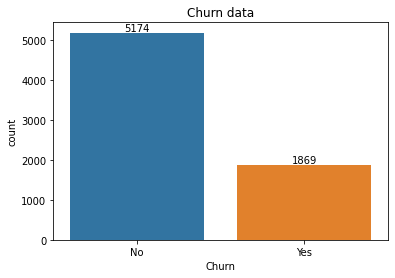

In [10]:

ax = sns.countplot(x='Churn', data=df)  

# Loop through the bars  
for bar in ax.containers[0]:  
    height = bar.get_height()  
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.0f}', ha='center', va='bottom')  
plt.title("Churn data")
plt.show()

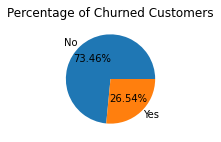

In [11]:
gb = df.groupby("Churn").agg({'Churn':"count"})
gb

plt.figure(figsize = (2,3))
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%" )
plt.title("Percentage of Churned Customers",fontsize = 12)
plt.show()

#from the given pie chart we can conclude that 26.54% of customer have churned out #not Let's explore the reason Behind it

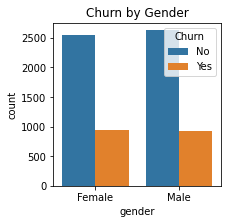

In [12]:
plt.figure(figsize = (3,3))
sns.countplot(x = "gender", data =df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

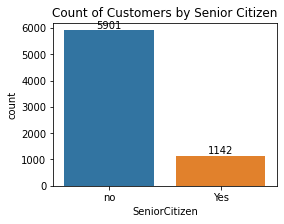

In [13]:
plt.figure(figsize = (4,3))
ax = sns.countplot(x = "SeniorCitizen", data = df) 
ax.bar_label(ax.containers[0])

plt.title("Count of Customers by Senior Citizen")
plt.show()

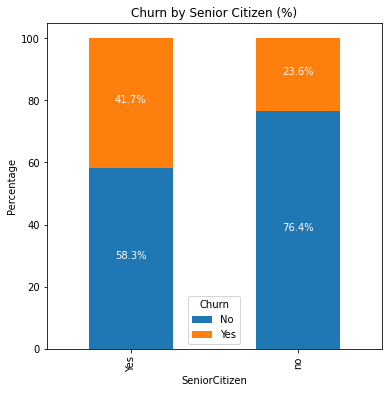

In [15]:


# Calculate the percentage of churn within each Senior Citizen category
df_grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Convert counts to percentages
df_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
df_percent.plot(kind='bar', stacked=True, figsize=(6,6), color=['#1f77b4', '#ff7f0e'])

# Add labels for percentages
for n, x in enumerate([*df_percent.index]):
    for (i, val) in enumerate(df_percent.loc[x]):
        plt.text(n, val / 2 + sum(df_percent.loc[x][:i]), f'{val:.1f}%', ha='center', color='white')

# Customize plot
plt.title("Churn by Senior Citizen (%)")
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen")
plt.legend(title="Churn")
plt.show()


In [16]:
# comparative a greated pecentage of people in senior citizen category have churned

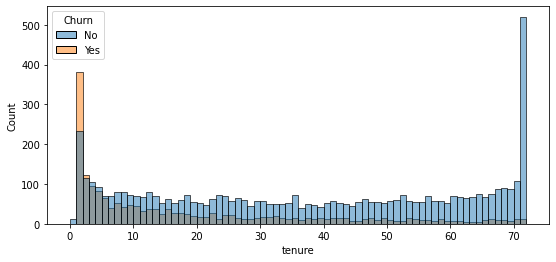

In [20]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72 ,hue = "Churn" )
plt.show()

#people who have used our services for a long time have stayed and people who have used our service#1 or 2 months have churned

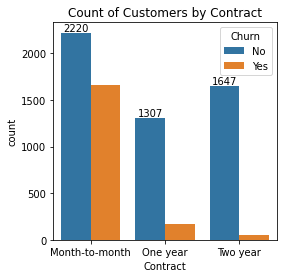

In [32]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn") 
ax.bar_label(ax.containers[0])

plt.title("Count of Customers by Contract")
plt.show()

people who have month to month contract are likely to churn them those who have 1 or 2 years or contract

In [25]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

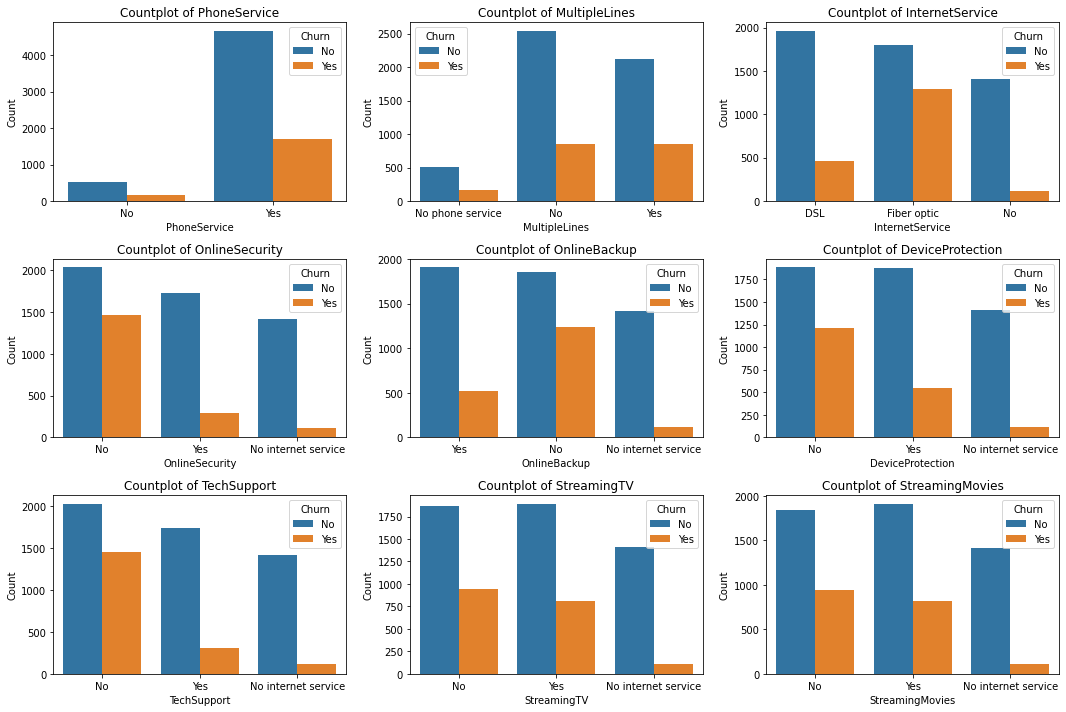

In [29]:

# Sample data assuming 'df' is your DataFrame
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set the number of rows and columns for the subplots grid
n_rows = 3
n_cols = 3

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over the columns and plot each as a countplot
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df['Churn'])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


The visual data highlights key factors affecting customer churn in a telecom company:

- Customers without **Phone Service** or **Multiple Lines** tend to churn less.
- Lack of **OnlineSecurity**, **OnlineBackup**, and **DeviceProtection** correlates with higher churn rates.
- **Fiber optic internet** users churn more than DSL users.
- Not having **StreamingTV**, **StreamingMovies**, or **TechSupport** is associated with higher churn.

Overall, certain services play a crucial role in retaining customers, while their absence leads to increased churn.



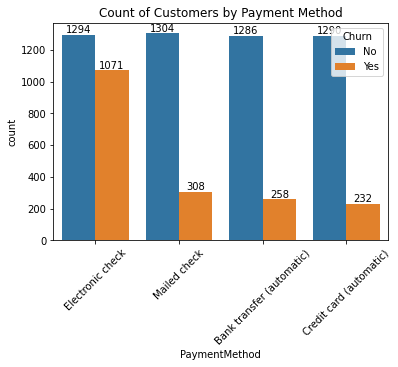

In [44]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn") 
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Payment Method")
plt.xticks(rotation = 45) 
plt.show()

#customer is likely to churn when he is using electronic check as a payment method.